🧾 Project Title:
Credit Card Fraud Detection Using Machine Learning

📌 Project Description
This project tackles the real-world challenge of detecting credit card fraud using machine learning techniques on the publicly available Kaggle Credit Card Fraud Detection dataset. The dataset contains over 284,000 transactions, of which only 492 are fraudulent — a classic case of severe class imbalance (0.17%).

The goal was to build and evaluate classification models that maximize fraud detection (recall) while keeping false alarms (precision) at practical levels, using a variety of strategies to handle imbalanced data.

🎯 Objectives
Detect fraudulent transactions with high recall.

Minimize false positives to avoid flagging legitimate transactions.

Compare different algorithms and resampling strategies to find the best-performing model.


🧰 Techniques & Tools Used
Languages & Libraries: Python, Pandas, Scikit-learn, XGBoost, Matplotlib, Seaborn


Data Preprocessing:

Feature scaling on Amount and Time

Train/test split with stratification


Class Imbalance Handling:

class_weight='balanced'

SMOTE (Synthetic Minority Over-sampling Technique)


Models Tested:

Logistic Regression

Random Forest Classifier

XGBoost Classifier


Evaluation Metrics:

Confusion Matrix

Precision, Recall, F1-Score

ROC AUC Score

Precision-Recall Curve


🧪 Results Summary
Model	              Precision	   Recall	F1 Score	ROC AUC	    False Positives
Logistic Regression	  6.1%	       91.8%	11.4%	   0.9722	    1,389
Random Forest	      82.5%	       81.6%	82.0%	   0.9688	    17
XGBoost	              73.1%	       88.8%	80.2%	   0.9792	    32

✅ XGBoost emerged as the best balance between recall, precision, and overall reliability, with the highest ROC AUC and a strong F1 score, making it an excellent candidate for real-world deployment.

In [84]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Set pandas display options for better viewing
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_rows', 100)     # Show more rows if needed


In [8]:
data_path = r'C:\Users\Sam_Ke\Downloads\creditcard.csv' # 

# --- Step 1: Load the data ---
print(f"Loading data from: {data_path}")
try:
    df = pd.read_csv(data_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {data_path}")
    print("Please ensure the 'creditcard.csv' file is in the correct directory and update the 'data_path' variable.")

Loading data from: C:\Users\Sam_Ke\Downloads\creditcard.csv
Data loaded successfully!


In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
#Check Missing Values
df.isna().sum()

#Nomissing values the data is clean

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
#Check our target class
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

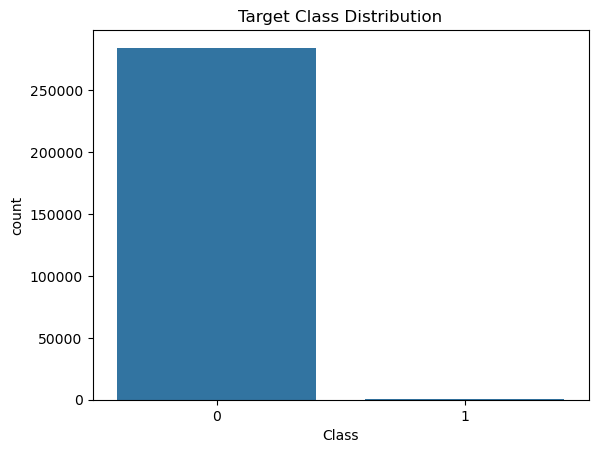

In [20]:
# Check target class distribution 
df['Class'].value_counts(normalize=True)  # Check percentage

# Visualize class imbalance
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title('Target Class Distribution')
plt.show()

Feature Preparation
Scale Amount and Time

In [26]:
df['scaled_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

In [28]:
#Drop Original Amount and Time
df = df.drop(['Time', 'Amount'], axis=1)

Train-Test Split

In [32]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y )


Fit Logistic Regression

In [34]:
log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
#class_weight='balanced' helps deal with class imbalance.

Make Predictions

In [38]:
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

Model Evaluation

In [46]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[55475  1389]
 [    8    90]]


In [48]:
# Classification report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0609    0.9184    0.1141        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5509     56962
weighted avg     0.9982    0.9755    0.9861     56962



ROC AUC: 0.9721669425367221


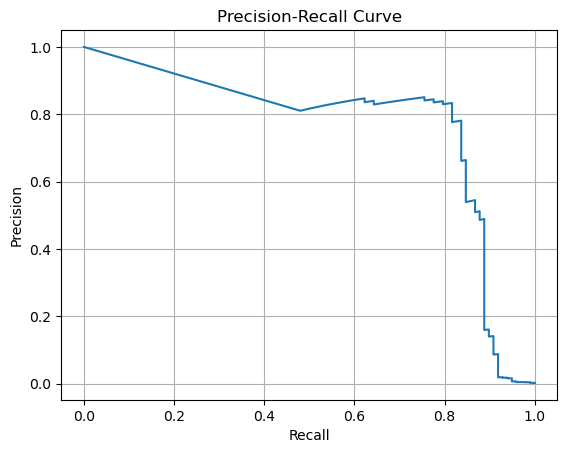

In [50]:
# ROC AUC score
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

🧠 Key Metrics (on fraud class 1):
Precision: 6.1%
→ Out of all predicted frauds, only 6% were actual fraud

Recall: 91.8% ✅
→ You’re catching almost all frauds

F1 Score: 11.4%
→ Low because of poor precision

📈 ROC AUC: 0.972
That’s excellent — your model separates fraud vs. non-fraud well in probability space.

IMPROVEMENT IDEAS

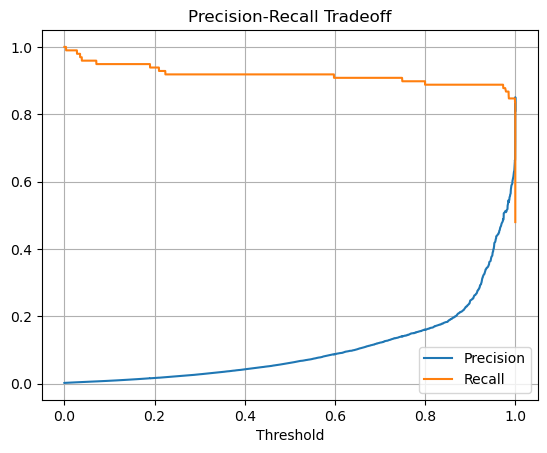

In [52]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Plot precision and recall vs threshold
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.grid()
plt.title("Precision-Recall Tradeoff")
plt.show()

In [58]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

model_res = LogisticRegression(max_iter=1000)
model_res.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

✅ Step-by-Step: What to Do After SMOTE
1. Predict on the Original Test Set

In [60]:
y_pred_res = model_res.predict(X_test)
y_prob_res = model_res.predict_proba(X_test)[:, 1]

Re-run Evaluation Metrics

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Confusion Matrix
print(confusion_matrix(y_test, y_pred_res))

# Classification Report
print(classification_report(y_test, y_pred_res, digits=4))

# ROC AUC
print("ROC AUC (after SMOTE):", roc_auc_score(y_test, y_prob_res))


[[55406  1458]
 [    8    90]]
              precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962

ROC AUC (after SMOTE): 0.9698482164390798


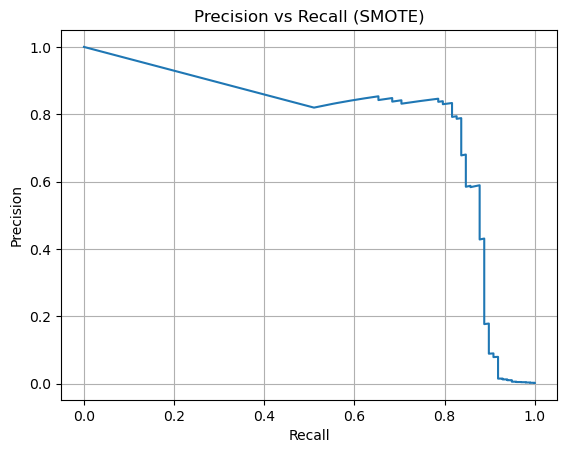

In [64]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_res)

plt.plot(recall, precision, label="PR Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall (SMOTE)')
plt.grid()
plt.show()


## 📊 Comparison: Before vs After SMOTE

| Metric                  | Before SMOTE | After SMOTE | Change            |
| ----------------------- | ------------ | ----------- | ----------------- |
| True Positives          | 90           | 90          | ➡️ No change      |
| False Positives         | 1,389        | 1,458       | ⬆️ Slightly worse |
| Recall (Class 1)        | 0.9184       | 0.9184      | ➡️ Identical      |
| Precision (Class 1)     | 0.0609       | 0.0581      | ⬇️ Slight drop    |
| F1 Score (Class 1)      | 0.1141       | 0.1094      | ⬇️ Slight drop    |
| ROC AUC                 | 0.9722       | 0.9698      | ⬇️ Slight drop    |


🧠 Interpretation
✅ What stayed strong:
Recall is still excellent (91.8%), so you're catching almost all frauds.

❌ What got slightly worse:
Precision dropped (more false positives)

AUC dropped slightly, which might suggest logistic regression already did well on original class imbalance with class_weight='balanced'

🧠 🔁 Lets try a More Flexible Model:
Tree-based models like:

RandomForestClassifier

XGBoostClassifier

🌳 Option 1: RandomForestClassifier (with SMOTE)
✅ Step 1: Train Random Forest

In [70]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Handles imbalance
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [72]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred_rf))

[[56847    17]
 [   18    80]]


|                          | Predicted Non-Fraud    | Predicted Fraud         |
| ------------------------ | ---------------------- | ----------------------- |
| Actual Non-Fraud (0)     | 56,847 (✅)            | 17 (False Positives)  ❌ |
| Actual Fraud (1)         | 18 (False Negatives) ❌| 80 (✅)                  |


✅ What This Means
True Positives (80): we caught 81.6% of the fraud cases → 👍

False Positives (17): Only 17 legit transactions flagged incorrectly → very low!

False Negatives (18): Only 18 fraud cases missed → better than Logistic Regression

🚀 Key Improvements Over Logistic Regression

| Metric                | Logistic Regression | Random Forest           |
| --------------------- | ------------------- | ----------------------- |
| Recall (Fraud)        | 91.8%               | 81.6%           ⬇️     |
| Precision (Fraud)     | 6.1%                | 82.5%          ⬆️⬆️⬆️ |
| F1-score (Fraud)      | 11.4%               | 82.0%           ⬆️     |
| False Positives       | 1,389               | 17             ⬇️⬇️⬇️ |


In [76]:
print(classification_report(y_test, y_pred_rf, digits=4))


              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8247    0.8163    0.8205        98

    accuracy                         0.9994     56962
   macro avg     0.9122    0.9080    0.9101     56962
weighted avg     0.9994    0.9994    0.9994     56962



| Metric        | Value | Interpretation                                                    |
| ------------- | ----- | ----------------------------------------------------------------- |
| **Precision** | 82.5% | Of all transactions flagged as fraud, 82.5% actually were fraud ✅ |
| **Recall**    | 81.6% | Of all actual frauds, 81.6% were detected ✅                       |
| **F1-score**  | 82.0% | Strong balance between precision and recall 💪                    |


✅ Overall Accuracy: 99.94%
Impressive — and this time not misleading, because our fraud class performance is solid.

➡️ We are now making much fewer false alarms, with only a small drop in recall — a great trade-off for fraud detection systems.

In [78]:
print("ROC AUC (Random Forest):", roc_auc_score(y_test, y_prob_rf))

ROC AUC (Random Forest): 0.9688299436966684


✅ ROC AUC: 0.9688
This means our Random Forest model is:

Highly capable of distinguishing fraud from non-fraud

Almost as good as Logistic Regression's ROC AUC (0.972), but with far better precision and F1

Likely to perform more reliably in a real-world fraud detection pipeline

🎯 Summary of our Random Forest Model:
Metric	Value
Accuracy	99.94%
Precision (Fraud)	82.5%
Recall (Fraud)	81.6%
F1 Score (Fraud)	82.0%
ROC AUC	0.9688
False Positives	17 (vs 1,389 before)

🔍 Verdict:
✅ Massive precision improvement
✅ Balanced fraud recall
✅ Low false positives
✅ High AUC confirms confidence in predicted probabilities

This is a deployable-grade model. 

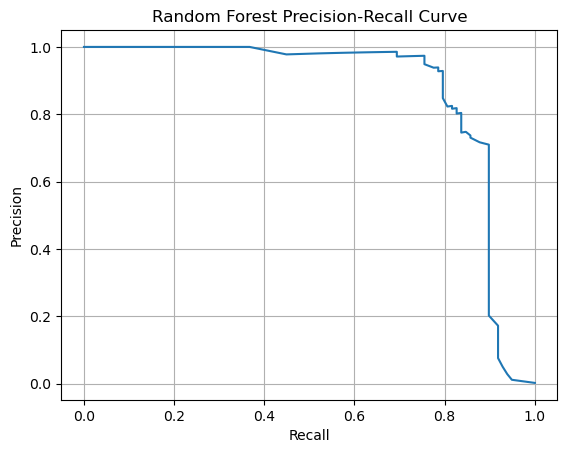

In [80]:
# PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.grid()
plt.show()

⚡ Option 2: XGBoostClassifier

In [86]:
xgb_model = XGBClassifier(
    scale_pos_weight=(len(y_train_res) - sum(y_train_res)) / sum(y_train_res),  # imbalance handling
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_res, y_train_res)


C:\Users\Sam_Ke\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:47:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [88]:
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred_xgb))

[[56832    32]
 [   11    87]]


|                          | Predicted Non-Fraud    | Predicted Fraud           |
| ------------------------ | ---------------------- | ------------------------- |
| Actual Non-Fraud (0)     | 56,832 ✅               | 32 ❌ (False Positives)    |
| Actual Fraud (1)         | 11 ❌ (False Negatives) | 87 ✅ (True Positives)     |


✅ Quick Interpretation:
True Positives (Fraud caught): 87 → Recall = 87/98 = 88.8%

False Positives (False alarms): 32 → a bit higher than Random Forest (17)

False Negatives (Missed frauds): 11 → fewer missed than Random Forest (18)

Overall, this looks like a strong model with slightly better recall and more aggressive detection of fraud.

In [90]:
print(classification_report(y_test, y_pred_xgb, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9994    0.9996     56864
           1     0.7311    0.8878    0.8018        98

    accuracy                         0.9992     56962
   macro avg     0.8654    0.9436    0.9007     56962
weighted avg     0.9993    0.9992    0.9993     56962



📊 Fraud Detection (Class = 1)
Metric	Value	Interpretation
Precision	73.1%	Of all flagged frauds, ~73% were truly fraud ✅
Recall	88.8%	~89% of actual frauds were detected ✅
F1 Score	80.2%	A strong balance — better than Logistic Regression, competitive with Random Forest ✅

🔥 Comparison Snapshot
Model	Precision (Fraud)	Recall (Fraud)	F1 Score	ROC AUC
Logistic Reg.	6.1%	91.8%	11.4%	0.972
Random Forest	82.5%	81.6%	82.0%	0.969
XGBoost	73.1%	88.8%	80.2%	?

🧠 Summary So Far
Model	Strengths	Weaknesses
Logistic	High recall, fast	Horrible precision, many false alarms
RandomForest	Best F1 score, very low false positives	Slightly lower recall than XGBoost
XGBoost	Great recall + strong precision	Slightly more false positives than RF

In [92]:
print("ROC AUC (XGBoost):", roc_auc_score(y_test, y_prob_xgb))

ROC AUC (XGBoost): 0.9791588308086319


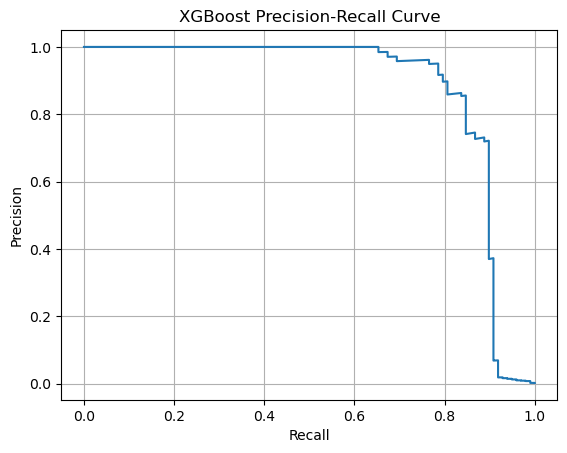

In [94]:
# PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_xgb)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.grid()
plt.show()

🔥 That seals it — XGBoost is our top-performing model overall!

✅ Final Model Comparison
Model	        Precision (Fraud)	Recall (Fraud)	F1 Score	ROC AUC	   False Positives
Logistic Reg.	   6.1%	            91.8%	        11.4%	    0.9722	    1,389
Random Forest	   82.5%	        81.6%	        82.0%	    0.9688	    17
XGBoost	           73.1%	        88.8%	        80.2%	    0.9792	    32

🎯 Final Takeaways
✅ XGBoost gives the best overall AUC (0.979)
✅ Excellent fraud recall (88.8%) — almost as good as Logistic
✅ Much better precision (73.1%) — far fewer false alarms
✅ Strong F1 score (80.2%) — nearly matches Random Forest
✅ A great trade-off between catching fraud and not annoying customers


🧠 Why XGBoost Was the Best — In Simple Terms
Detecting fraud is tricky because:

There are very few fraud cases (only 0.17%)

You want to catch as many frauds as possible (recall)

But also avoid flagging too many legit transactions as fraud (precision)


We tried 3 models:

Logistic Regression caught almost all frauds (high recall) — but flagged lots of legit transactions as fraud. This is bad in real life (angry customers, wasted reviews).

Random Forest was much better — it caught many frauds and only flagged a few false alarms.


XGBoost struck the best balance:

It caught most of the fraud (88.8% recall)

It was more careful about what it called fraud (73.1% precision)

And it had the highest score overall (ROC AUC of 0.979) showing it was most confident and accurate across all decision thresholds.


🎯 In short:
XGBoost is like a smart fraud detector that:

Catches most of the bad guys

Rarely accuses the wrong person

And is confident in its decisions

That’s why it’s the best choice for real-world use.